In [1]:
import gymnasium as gym
from core.algorithms import *
from core.wrapper import Wrapper
from collections import defaultdict
from gymnasium.wrappers import record_video
import matplotlib.pyplot as plt


In [4]:
env = gym.make('Taxi-v3', render_mode='rgb_array')
env = Wrapper(env=env)
soft_policy = defaultdict()
for i in range(500):
    soft_policy[i] = np.ones(10)/10.0
        
Q_1, rewards_1 = on_policy_monte_carlo_epsilon_soft(policy=soft_policy, env=env, num_episodes=50000, gamma=0.0)
Q_2, rewards_2 = on_policy_monte_carlo_epsilon_soft(policy=soft_policy, env=env, num_episodes=50000, gamma=0.9)


100%|██████████| 50000/50000 [07:20<00:00, 113.46it/s]


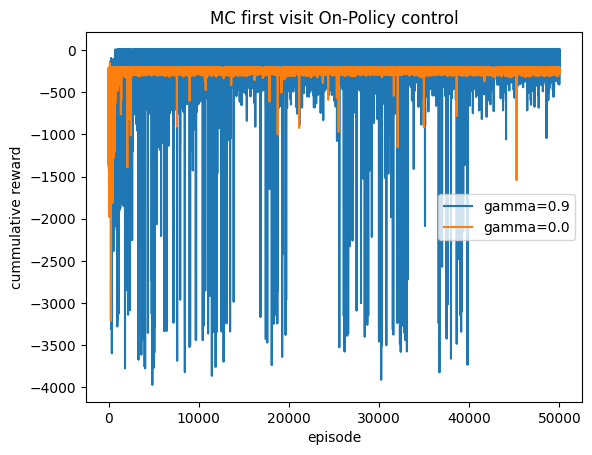

In [20]:
plt.plot(rewards_2)
plt.plot(rewards_1)
plt.title('MC first visit On-Policy control')
plt.xlabel('episode')
plt.ylabel('cummulative reward')
plt.legend(['gamma=0.9', 'gamma=0.0'])
plt.show()

In [3]:
def play(Q, name, num_episodes=1):
    env = gym.make('Taxi-v3', render_mode='rgb_array')
    env = Wrapper(env=env)
    env = record_video.RecordVideo(env, video_folder='runs', name_prefix=name)

    for i in range(num_episodes):
        state, _ = env.reset()
        done = False
        while not done:
            action = np.argmax(Q[state])
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            state = next_state
            env.render()
    
    env.close()

In [6]:
play(Q=Q_1, name='mc-first-visit-on-policy-control-gamma=0.0')
play(Q=Q_2, name='mc-first-visit-on-policy-control-gamma=0.9')

/home/arya/.local/lib/python3.10/site-packages/gymnasium/wrappers/record_video.py:79: UserWarning: WARN: Overwriting existing videos at /home/arya/Study/RL/Assignments/MiniProject2/runs folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Building video /home/arya/Study/RL/Assignments/MiniProject2/runs/mc-first-visit-on-policy-control-gamma=0.0-episode-0.mp4.
Moviepy - Writing video /home/arya/Study/RL/Assignments/MiniProject2/runs/mc-first-visit-on-policy-control-gamma=0.0-episode-0.mp4



/home/arya/.local/lib/python3.10/site-packages/gymnasium/wrappers/record_video.py:79: UserWarning: WARN: Overwriting existing videos at /home/arya/Study/RL/Assignments/MiniProject2/runs folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Moviepy - Done !
Moviepy - video ready /home/arya/Study/RL/Assignments/MiniProject2/runs/mc-first-visit-on-policy-control-gamma=0.0-episode-0.mp4
Moviepy - Building video /home/arya/Study/RL/Assignments/MiniProject2/runs/mc-first-visit-on-policy-control-gamma=0.9-episode-0.mp4.
Moviepy - Writing video /home/arya/Study/RL/Assignments/MiniProject2/runs/mc-first-visit-on-policy-control-gamma=0.9-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/arya/Study/RL/Assignments/MiniProject2/runs/mc-first-visit-on-policy-control-gamma=0.9-episode-0.mp4


In [2]:
env = gym.make('Taxi-v3', render_mode='rgb_array')
env = Wrapper(env=env)

        
# Q_learning_1, rewards_q_learning_1 = q_learning(env=env, num_episodes=50000, gamma=0.0)
Q_learning_2, rewards_q_learning_2 = q_learning(env=env, num_episodes=50000, gamma=0.9)


100%|██████████| 50000/50000 [00:39<00:00, 1280.95it/s]


In [14]:
Q_learning_2.shape

(500, 10)

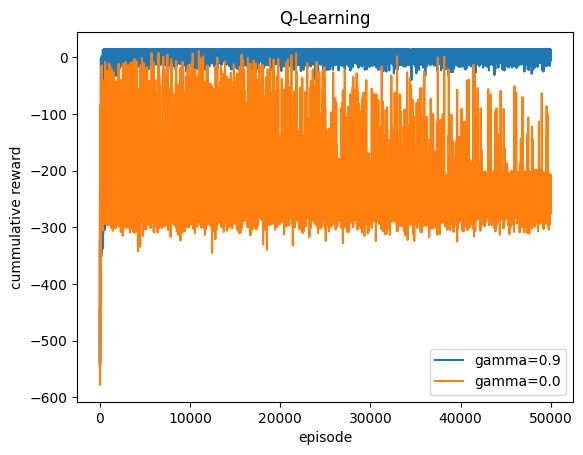

In [12]:
plt.plot(rewards_q_learning_2)
plt.plot(rewards_q_learning_1)
plt.title('Q-Learning')
plt.xlabel('episode')
plt.ylabel('cummulative reward')
plt.legend(['gamma=0.9', 'gamma=0.0'])
plt.show()

In [6]:
# play(Q_learning_1, 'q-learning-gamma-0.0')
play(Q_learning_2, 'q-learning-gamma-0.9', num_episodes=6)


Moviepy - Building video /home/arya/Study/RL/Assignments/MiniProject2/runs/q-learning-gamma-0.9-episode-0.mp4.
Moviepy - Writing video /home/arya/Study/RL/Assignments/MiniProject2/runs/q-learning-gamma-0.9-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/arya/Study/RL/Assignments/MiniProject2/runs/q-learning-gamma-0.9-episode-0.mp4


Moviepy - Building video /home/arya/Study/RL/Assignments/MiniProject2/runs/q-learning-gamma-0.9-episode-1.mp4.
Moviepy - Writing video /home/arya/Study/RL/Assignments/MiniProject2/runs/q-learning-gamma-0.9-episode-1.mp4



Moviepy - Done !
Moviepy - video ready /home/arya/Study/RL/Assignments/MiniProject2/runs/q-learning-gamma-0.9-episode-1.mp4


In [7]:
env = gym.make('Taxi-v3', render_mode='rgb_array')
env = Wrapper(env=env)

        
Q_sarsa_1 = sarsa(env=env, num_episodes=50000, gamma=0.0)
Q_sarsa_2 = sarsa(env=env, num_episodes=50000, gamma=0.9)


100%|██████████| 50000/50000 [03:03<00:00, 272.48it/s]


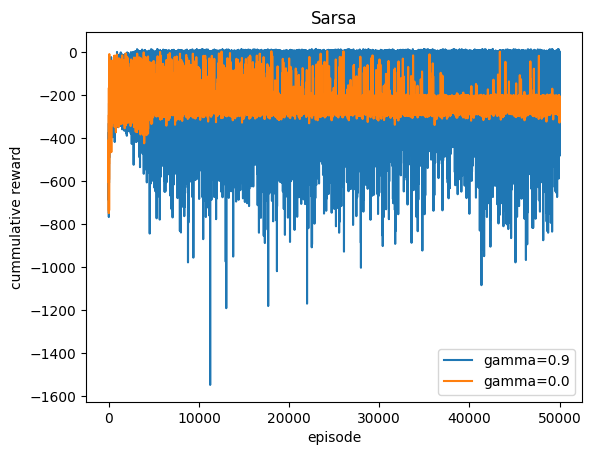

In [13]:
plt.plot(Q_sarsa_2[1])
plt.plot(Q_sarsa_1[1])
plt.title('Sarsa')
plt.xlabel('episode')
plt.ylabel('cummulative reward')
plt.legend(['gamma=0.9', 'gamma=0.0'])
plt.show()

In [11]:
play(Q_sarsa_1[0], 'sarsa-gamma-0.0')
play(Q_sarsa_2[0], 'sarsa-gamma-0.9')


/home/arya/.local/lib/python3.10/site-packages/gymnasium/wrappers/monitoring/video_recorder.py:182: UserWarning: WARN: Unable to save last video! Did you call close()?
  logger.warn("Unable to save last video! Did you call close()?")


Moviepy - Building video /home/arya/Study/RL/Assignments/MiniProject2/runs/sarsa-gamma-0.0-episode-0.mp4.
Moviepy - Writing video /home/arya/Study/RL/Assignments/MiniProject2/runs/sarsa-gamma-0.0-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/arya/Study/RL/Assignments/MiniProject2/runs/sarsa-gamma-0.0-episode-0.mp4
Moviepy - Building video /home/arya/Study/RL/Assignments/MiniProject2/runs/sarsa-gamma-0.9-episode-0.mp4.
Moviepy - Writing video /home/arya/Study/RL/Assignments/MiniProject2/runs/sarsa-gamma-0.9-episode-0.mp4



Moviepy - Done !
Moviepy - video ready /home/arya/Study/RL/Assignments/MiniProject2/runs/sarsa-gamma-0.9-episode-0.mp4
